# Solving the Schrödinger Equation

## Different Potention Functions *V*

"Particle in a Box" Potential Functions:
- Infinite Potential Well
- 1D Egg Carton (Cosine Potential)
- Finite Potential Well
- Semi-Infinite Potential Well
- Slanted Potential Well
- V-Shaped (Heaviside-Lambda) Potential Well
- Single/Multiple Internal Barriers
- Spherical Potential Well

Harmonic Oscillator Functions:
- Simple Harmonic Oscillator
- Quartic Oscillator
- Morse Oscillator
- Lennard-Jones Potential
- Double Morse Potential
- 2D Harmonic Oscillator
- 3D Harmonic Oscillator
- Hydrogen Atom Radial Equation
- Modified Harmonic Potential

In [116]:
import numpy as np

def infinite_potential_well(x, L, N, dx = 0):
        """
        Returns the potential function for a particle in an infinite potential well of length L.
        """
        if type(x) not in [int, float]:
                dx = x[1] - x[0]
                xp = np.linspace(dx, L-dx, N-1)
                U = np.linspace(dx, L-dx, N-1)
                for i in range(len(U)):
                        U[i] = 0
                        if xp[i] > L/4 and xp[i] < 3*L/4:
                                U[i] = 0
                        else:
                                U[i] = 500
        else: # This branch is for the shooting method
                U = 0
                if x > L/4 and x < 3*L/4:
                        U = 0
                else:
                        U = 500
        return U

def V_shaped__potential_well(x, L, N, slope = 400, dx = 0):
        """Returns the potential function for a particle in a V-shaped infinite potential well centre at x=L/2.

        Args:
                x (int or numpy.ndarray): The position of the particle.
                L (int): the length of the well
        """
        if type(x) != int:
                dx = x[1] - x[0]
        xp = np.linspace(dx, L-dx, N-1)
        U0 = 100
        U = np.linspace(dx, L-dx, N-1)
        for i in range(len(U)):
                U[i] = slope*abs(xp[i] - L/2)
        return U

def complex_step_function_potential(x, L, N, dx = 0):
        """
        Potential function for the particle.
        """
        if type(x) != int:
                dx = x[1] - x[0]
        xp = np.linspace(dx, L-dx, N-1)
        U0 = 150
        U = np.linspace(dx, L-dx, N-1)
        for i in range(len(U)):
                U[i] = 0
                if xp[i] > L/4 and xp[i] < 3*L/4:
                        U[i] = U0
                elif (xp[i] >= 3*L/4 and xp[i] <= 5*L/8) or (xp[i] <= L/4 and xp[i] >= L/8):
                        U[i] = 0
                else:
                        U[i] = 90
        return U

def simple_step_function_potential(x, L = 1, N = 1000, dx = 0):
        U0 = 100
        if type(x) not in [int, float]:
                dx = x[1] - x[0]
                xp = np.linspace(dx, L-dx, N-1)
                U = np.linspace(dx, L-dx, N-1)
                for i in range(len(U)):
                        U[i] = 0
                        if xp[i] > L/2:
                                U[i] = U0
        else: # This branch is for the shooting method
                U0 = 5
                U = 0
                if x > L/2:
                        U = U0
        return U

def zero_potential(x, L = 1, N = 1000, dx = 0):
        """
        Returns the potential function for a particle in a flat zero potential of length L.
        """
        if type(x) not in [int, float]:
                dx = x[1] - x[0]
                U = np.linspace(dx, L-dx, N-1)
                for i in range(len(U)):
                        U[i] = 0
        else: # This branch is for the shooting method
                U = 0
        return U

## Different Numerical Methods

- Finite Difference Method
- Finite Element Method
- Numerov Method
- Split-Step Fourier Method

### Lax-Wendroff Finite Difference Method

The Schrodinger Equation takes the form
$$ -\frac{\hbar^2}{2m}\frac{\partial^2\psi}{\partial x^2} + U\psi = E\psi$$

where $U$ is the potential energy, $E$ is the kinetic energy, $\hbar$ is the reduced Plack constant, $m$ is mass, and $\psi$ is the wavefunction. Because this is a second order PDE, it cannot be integrated directly, so must be somehow simplified.

Say we are integrating over some range $a$ to $b$. In the Finite Difference method, the integral is split up into some discrete grid of $N$ points ranging over $a$ to $b$. At each grid point, the wavefunction $\psi$ at that point is denoted by $\psi_i$, where $i \in (0, N)$. The first derivative of the wavefunction with respect to position $x$ $\psi'$ can be written as:
$$\psi' = \frac{\Delta \psi}{\Delta x} = \frac{\psi_{i+1} - \psi_{i-1}}{2\Delta x}$$
where $\Delta x$ is the grid spacing. From this, we can find that the second derivative with respect to position $x$ can be written as:
$$\psi'' = \frac{\frac{\psi_{i+1} - \psi_{i}}{\Delta x} - \frac{\psi_{i} - \psi_{i-1}}{\Delta x}}{\Delta x} = \frac{\psi_{i+1} - 2\psi_i + \psi_{i-1}}{\Delta x^2}$$

From that, we can now rewrite the Schrodinger equation as:
$$ -\frac{\hbar^2}{2m}\left(\frac{\psi_{i+1} - 2\psi_i + \psi_{i-1}}{\Delta x^2}\right) + U_i\psi_i = E\psi_i$$

We can see now that this is a set of linear equations (that doesn't include the boundaries $\psi_0$ or $\psi_N$). We can then write this as a set of matrix equations:
$$\vec{H}\cdot\vec{\psi} = \vec{E}\cdot\vec{\psi}$$
where $\vec{H}$ is the Hamiltonian matrix:
$$
H = \begin{bmatrix}
\left(\frac{\hbar^2}{m\Delta x^2} + U_i\right) & \left(\frac{-\hbar^2}{2m\Delta x^2}\right) & 0 & \cdots & 0 \\
\left(\frac{-\hbar^2}{2m\Delta x^2}\right) & \left(\frac{\hbar^2}{m\Delta x^2} + U_i\right) & \left(\frac{-\hbar^2}{2m\Delta x^2}\right) & \ddots & \vdots \\
0 & \left(\frac{-\hbar^2}{2m\Delta x^2}\right) & \left(\frac{\hbar^2}{m\Delta x^2} + U_i\right) & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & \left(\frac{-\hbar^2}{2m\Delta x^2}\right) \\
0 & \cdots & 0 & \left(\frac{-\hbar^2}{2m\Delta x^2}\right) & \left(\frac{\hbar^2}{m\Delta x^2} + U_i\right) \\
\end{bmatrix}
$$
$\vec{\psi}$ is the set of wavefunctions:
$$
\vec{\psi} = \begin{bmatrix}
\psi_1 \\
\psi_2 \\
\vdots \\
\vdots \\
\psi_{N-1} \\
\end{bmatrix}
$$
and $\vec{E}$ is the set of eigenvectors corresponding to the Hamiltonian. We can see now that the equation has been reduced to the eigenvalue problem. Now, all that has to be done is to solve for the matrix $\vec{E}$ to retrieve the eigenmodes of the Schrodinger for some potential function $U(x)$.

In [176]:
import numpy as np

def FD_flat_potential(x, L, N):
        """
        Returns the potential function for a particle with a flat potential.
        """
        U = np.ones(len(x) - 2)
        return U

def FD_small_step(x, L = 1, N = 1000, dx = 0):
        U0 = 350
        if type(x) not in [int, float]:
                dx = x[1] - x[0]
                xp = np.linspace(dx, L-dx, N-1)
                U = np.linspace(dx, L-dx, N-1)
                for i in range(len(U)):
                        U[i] = 0
                        if xp[i] > L/2:
                                U[i] = U0
        return U

def FD_complex_step_potential(x, L, N, dx = 0):
        """
        Potential function for the particle.
        """
        if type(x) != int:
                dx = x[1] - x[0]
        xp = np.linspace(dx, L-dx, N-1)
        U = np.linspace(dx, L-dx, N-1)
        for i in range(len(U)):
                if xp[i] > L/4 and xp[i] < 3*L/4:
                        U[i] = 150
                elif (xp[i] >= 3*L/4 and xp[i] <= 5*L/8) or (xp[i] <= L/4 and xp[i] >= L/8):
                        U[i] = 0
                else:
                        U[i] = 90
        return U

def FD_infinite_potential_well(x, L, N, dx = 0):
        """
        Returns the potential function for a particle in an infinite potential well of length L.
        """
        if type(x) not in [int, float]:
                dx = x[1] - x[0]
                xp = np.linspace(dx, L-dx, N-1)
                U = np.ones_like(xp)
                for i in range(len(U)):
                        if xp[i] < L/8 or xp[i] > 7*L/8:
                                U[i] = 500
        return U

def FD_V_shaped__potential_well(x, L, N, slope = 400, dx = 0):
        """Returns the potential function for a particle in a V-shaped infinite potential well centre at x=L/2.

        Args:
                x (int or numpy.ndarray): The position of the particle.
                L (int): the length of the well
        """
        if type(x) != int:
                dx = x[1] - x[0]
        xp = np.linspace(dx, L-dx, N-1)
        U = np.ones_like(xp)
        for i in range(len(U)):
                U[i] = slope*abs(xp[i] - L/2) + 1
        return U

In [204]:
## Finite Difference
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def finite_difference(potential_func, N, num_plots = 4, plot = True, scale = 1):
        '''
        Solves the Schrodinger equation using the finite difference method
        and plots the results.
        Inputs:
        - potential_func: The potential function for the particle.
        - N: The number of points in the grid.
        - num_plots: The number of energy levels to plot.
        - plot: Whether or not to plot the results.

        Outputs:
        None

        '''
        def create_hamiltonian_matrix(N, m, hbar, Vpot, dx):
                """
                Helper Function
                Create the Hamiltonian matrix for the given potential.
                """
                diag_el = hbar**2/(m*dx**2)*np.ones(N-1) + Vpot
                off_diagonal_elements = -hbar**2/(2*m*dx**2)*np.ones(N - 2)
                Hmat = np.diag(diag_el) + np.diag(off_diagonal_elements, 1) + np.diag(off_diagonal_elements, -1)

                return Hmat
        
        
        hbar = 1 # Planck's constant set to 1 for simplicity
        m = 1 # Mass of the particle set to 1 for simplicity
        a = 1 # Length of the well

        x = np.linspace(0, a, N+1) # Grid points
        dx = x[1] - x[0] # Step size
        xp = np.linspace(dx, a-dx, N-1) # Grid points for plotting

        U = potential_func(x, a, N) # Potential function
        E, psi = eigh(create_hamiltonian_matrix(N, m, hbar, U, dx)) # Solve the Schrodinger equation

        # Fetch the name of the potential function for plotting reasons
        plot_title = potential_func.__name__.split('_')
        for i in range(len(plot_title)):
                plot_title[i] = plot_title[i].title()
        plot_title = ' '.join(plot_title)

        if plot:
                # Get a color map
                cmap = plt.get_cmap('cool')
                colors = [cmap(i) for i in np.linspace(0, 1, num_plots)]

                plt.figure(1)
                plt.title(f"Finite Difference Method, {plot_title}")
                plt.plot(x[1:-1], U, 'k--')

                # Set limits for any infinite potential wells
                if "Infinite" in plot_title:
                        plt.ylim(0, 300)

                for i in range(num_plots): 
                        cur_psi = psi.T[i]**2
                        I = np.sum(psi.T[i]**2 * dx)
                        A = np.sqrt(1/I)
                        plt.plot(xp, (scale*A*psi.T[i])**2 + E[i], color = colors[i])
                plt.xlabel('x')
                plt.ylabel('$\psi(x)$')
                plt.show()

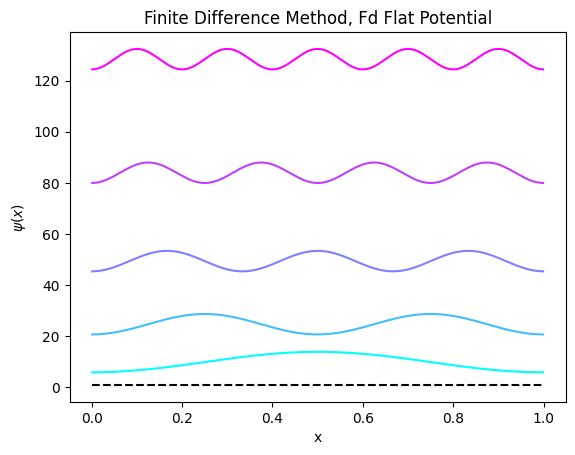

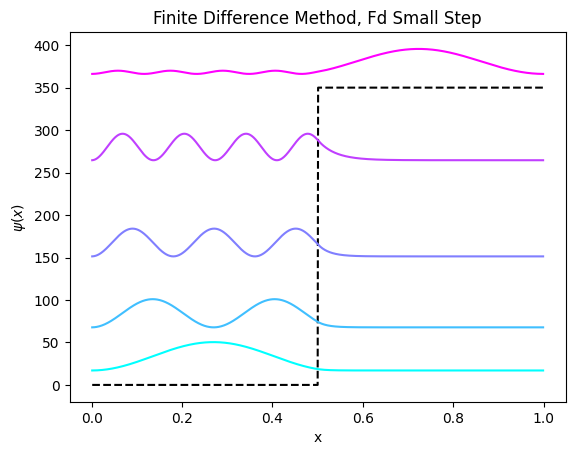

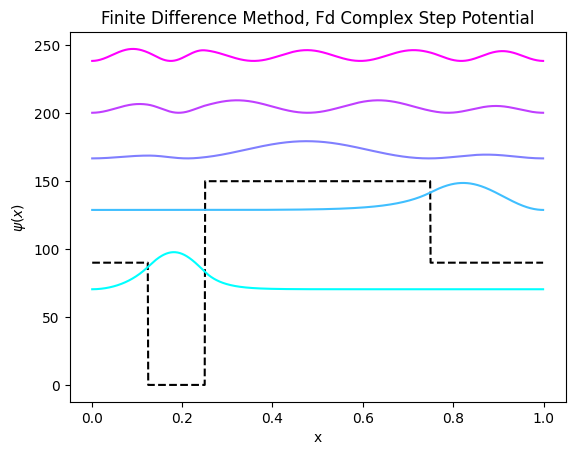

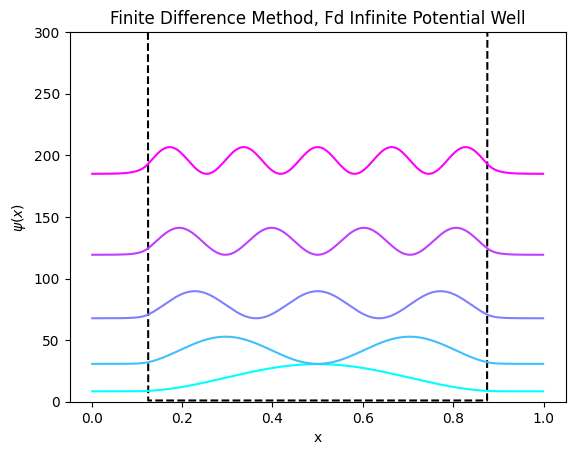

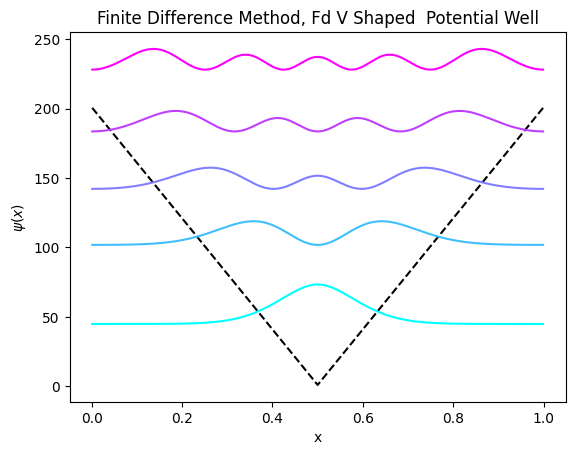

In [212]:
finite_difference(FD_flat_potential, 1000, 5, scale = 2)
finite_difference(FD_small_step, 1000, 5, scale = 3)
finite_difference(FD_complex_step_potential, 1000, 5, scale = 2)
finite_difference(FD_infinite_potential_well, 1000, 5, scale = 3)
finite_difference(FD_V_shaped__potential_well, 1000, 5, scale = 2.5)

### Numerov Method

The Schrödinger equation is typically of the form

$$
-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\psi_n(x) + V(x)\psi_n(x) = E_n\psi_n(x),
$$

where $\psi_n(x)$ are the wavefunctions, $E_n$ are the eigenstates and $V(x)$ is some potential. It is sometimes convenient to work with a dimensionless form of this equation in order to avoid working with factors of $\hbar$. It can be re-written as

$$
\frac{d^2}{dx^2}\psi(\tilde{x}) + \gamma^2(\epsilon - \nu(\tilde{x}))\psi(\tilde{x}) = 0,
$$

where $\tilde{x} = \frac{x}{L}$ is a dimensionless distance which ranges from 0 to 1, $\epsilon = \frac{E}{V_0}$ and $\nu(\tilde{x}) = \frac{V(\tilde{x})}{V_0}$
are the dimensionless eigenstates and potential, where $V_0$ is the depth of the well, and $\gamma^2 = \frac{2mL^2V_0}{\hbar^2}$ is a dimensionless
factor which accounts for the constants in the equation.

Since this equation is of the form

$$
\frac{d^2}{dx^2}\psi(x) + k^2(x)\psi(x) = 0,
$$

where $k^2(x) = \gamma^2(\epsilon - \nu(\tilde{x}))$ in this case, it can be integrated using the Numerov algorithm. By defining $\tilde{x}$
with a discrete set of $N$ points, separated by a distance $\Delta x = \frac{1}{N-1}$, this equation can be written in discrete form:

$$
\frac{d^2}{dx^2}\psi_n + k^2_n\psi_n = 0,
$$

where $\psi_n \equiv \psi(\tilde{x}_n)$, $\tilde{x}_n$ being the $n$ th point, etc. The integration scheme is given by

$$
\psi_{n+1} = \frac{2(1-\frac{5}{12}\Delta x^2k^2_n)\psi_n - (1+\frac{1}{12}\Delta x^2k^2_{n-1}/12)\psi_{n-1}}{1+\frac{5}{12}\Delta x^2k^2_{n+1}}.
$$

which can be coded as an iterative linear update scheme. This algorithm requires some initial guess for the energy $\epsilon$, which appears in the $k$ term. From this term, the wavefunction $\psi$ can be found through linearly integrating across the grid.

In [128]:
import numpy as np

def Nv_flat_potential(x):
        """
        Returns the potential function for a particle with a flat potential.
        """
        U = np.ones(len(x))
        return U

def Nv_small_step_potential(x):
        """
        Returns the potential function for a particle with a small step in the centre.
        """
        U = np.ones(len(x))
        for i in range(len(U)):
                if i > len(x)/2:
                        U[i] = 5
        return U

def Nv_complex_step_potential(x):
        """
        Returns the potential function for a particle with a complex step in the centre.
        """
        L = len(x)
        U = np.ones(L)
        for i in range(L):
                if i > L/4 and i < 3*L/4:
                        U[i] = 150
                elif (i >= 3*L/4 and i <= 5*L/8) or (i <= L/4 and i >= L/8):
                        U[i] = 0
                else:
                        U[i] = 90
        return U

def Nv_infinite_potential_well(x):
        """
        Returns the potential function for a particle in an infinite potential well.
        """
        L = len(x)
        U = np.ones(L)
        for i in range(len(U)):
                if i < L/8 or i > (7*L)/8:
                        U[i] = 50
        return U

def Nv_V_shaped_potential(x, slope = 5):
        """
        Returns the potential function for a particle in a V-shaped infinite potential well.
        """
        L = len(x)
        U = np.ones(L)
        for i in range(len(U)):
                cur_x = x[i]
                U[i] = slope*abs(cur_x - x[L//2]) + 1 # Should be no 0 or negative potentials
        
        return U

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson as simps

def wavefunction(Psi, k, N, dx):
    '''
    This function calculates the wavefunction using the Numerov method.
    Inputs:
    - Psi (numpy.ndarray or list): Contains the amplitude of the wavefunction at discrete points along the grid
    - k (numpy.ndarray or list): Contains the k values for each point along the grid
    - N (int): Number of steps
    - dx (float): Step size

    Outputs:
    - Psi (numpy.ndarray): The wavefunction after integrating via the Numerov method

    '''
    Psi[0] = 0
    Psi[1] = 1e-4

    for i in range(2, N):
        Psi[i] = (2 * (1 - (5/12) * dx * k[i-1]) * Psi[i-1] - (1 + (1/12) * dx * k[i-2]) * Psi[i-2]) / (1 + (1/12) * dx * k[i])
    return Psi

def epsilon(E, dE, N, v, Psi, dx):
    '''
    This function calculates the eigenstate of the particle using the Numerov method.
    This function takes some rough initial energy guess and refines it using the Numerov method to get a more accurate initial guess for the energy.
    Inputs:
    - E (float): Initial Energy guess of the particle
    - dE (float): Energy step
    - N (int): Number of steps
    - v (numpy.ndarray): Potential Energy Array
    - Psi (numpy.ndarray): Wavefunction Array
    - dx (float): Step size

    Outputs:
    - E (float): The approximate eigenstate of the particle
    
    '''
    gamma = 200 # gamma^2 = 2mL^2V0/hbar^2
    k = gamma * (E - v) # Updates k each time
    Psi = wavefunction(Psi, k, N, dx)
    P1 = Psi[N - 1]
    E += dE

    while abs(dE) > 1e-12: # Sets accuracy of the function
        k = gamma*(E - v)
        Psi = wavefunction(Psi, k, N, dx)
        P2 = Psi[N - 1]

        if P1*P2 < 0: # Sign change
            dE = -dE/2.0
        
        E += dE
        P1 = P2
    return E # Return eigenstate

def normal_helper(psi_p, dx):
    '''
    This function normalises the wavefunction.
    Inputs:
    - psi_p (numpy.ndarray): Wavefunction Array
    - dx (float): Step size

    Outputs:
    - area (float): The area under the wavefunction

    '''
    # Normalise the wavefunction
    area = 0
    for i in range(len(psi_p)):
        area += psi_p[i]**2*dx
    return area

def Numerov(potential_function, num_states, N = 1000, plot = True, scale = 1):
    '''
    This function solves the Schrodinger equation using the Numerov method.
    It makes use of the epsilon, wavefunction, and normal_helper functions.
    Inputs:
    - potential_function (function): The potential function for the particle.
    - num_states (int): The number of energy levels to plot.
    - N (int): Number of steps
    - plot (boolean): Whether or not to plot the results.
    - scale (float): Scales the wavefunction for plotting purposes

    Outputs:
    None
    
    '''


    psi_hist = [] # stores the Wavefunctions of the first num_states eigenstates in an array
    E_array = [] # Energy array
    areas = [] # Area array

    E_i = -1 # Initial energy guess
    gamma = 200 # variable gamma: gamma^2 = 2mL^2V0/hbar^2
    dE = 0.1 # Change in energy
    dx = (1/(N-1))**2 # Step size
    
    xx = np.linspace(0, 1, N) # Grid points
    v = np.array(potential_function(xx)) # Potential Energy Array

    while len(psi_hist) < num_states:  # Gets the first num_states eigenstates
        Psi = np.zeros(N) # Wavefunction, starts as an empty array
        
        E_trial = epsilon(E_i, dE, N, v, Psi, dx) # Gets the eigenstate guess

        k = gamma*(E_trial - v) # variable k: k^2 = gamma^2*(epsilon - v)

        p = wavefunction(Psi, k, N, dx) # Gets the wavefunction
        area = normal_helper(p, dx) # Normalises the wavefunction

        psi_hist += [p] # Adds the wavefunction to the array
        E_array += [E_trial] # Adds the energy to the array
        areas += [area] # Adds the area to the array
        E_i = E_trial + 0.1 # Updates the initial energy guess to get the next energy level

    if plot:
        # Fetch the name of the potential function for plotting reasons
        plot_title = potential_function.__name__.split('_')
        for i in range(len(plot_title)):
            plot_title[i] = plot_title[i].title()
        plot_title = ' '.join(plot_title)

        # Get a color map
        cmap = plt.get_cmap('cool')
        colors = [cmap(i) for i in np.linspace(0, 1, num_states)]

        plt.figure(1)
        plt.title(f"Numerov Method, {plot_title}")
        # Plot the potential function

        
        if "V Shaped" in plot_title: # Cheese the V-shaped well a bit so you can actually see the wavefunctions
            plt.plot(xx, potential_function(xx, slope = 7), 'k--')
            plt.ylim(0, 5)
        else:
            plt.plot(xx, v, 'k--')

        # Set limits for any infinite potential wells
        if "Infinite" in plot_title:
            plt.ylim(0, 5)

        for i in range(len(psi_hist)):
            cur_psi = np.array(psi_hist[i]) # Square the wavefunction to get the probability density
            I = np.sum(cur_psi**2 * dx) # Get the area under the wavefunction
            A = np.sqrt(1/I) # Amplitude

            plt.plot(xx, (A*scale*cur_psi)**2 + E_array[i], c = colors[i])
        plt.show()


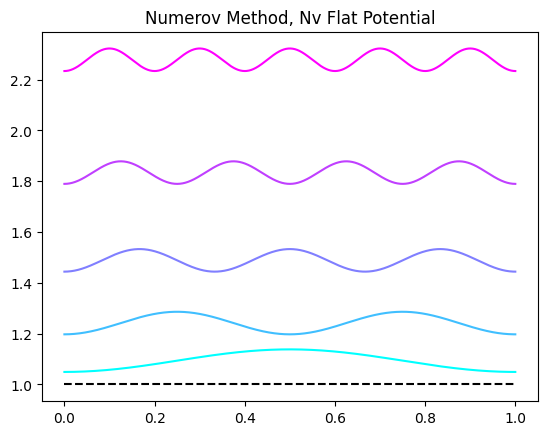

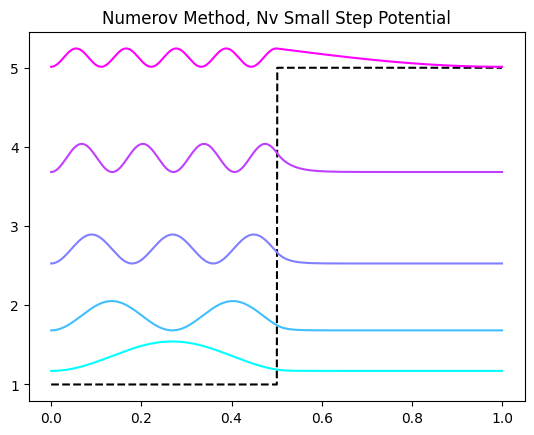

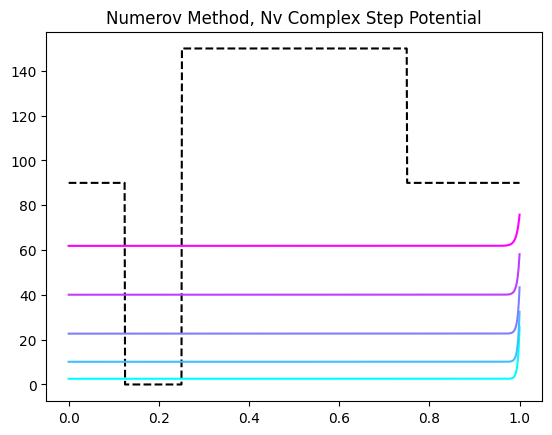

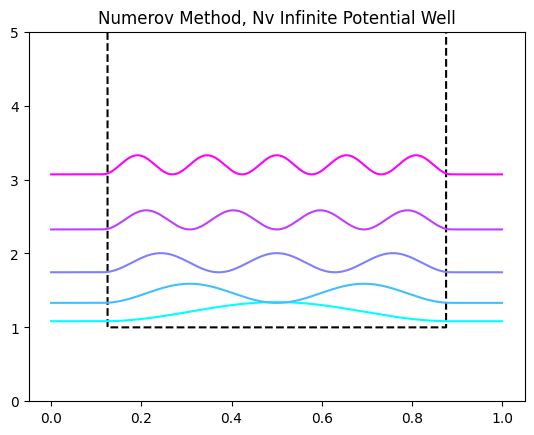

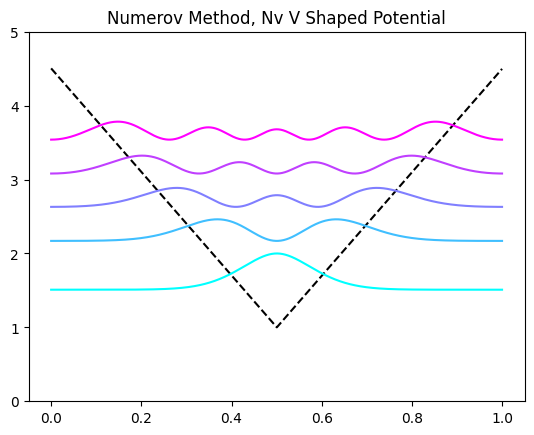

In [219]:
Numerov(Nv_flat_potential, 5, scale = 1/150)
Numerov(Nv_small_step_potential, 5, scale = 1/100)
Numerov(Nv_complex_step_potential, 5, scale = 1/100)
Numerov(Nv_infinite_potential_well, 5, scale = 1/100)
Numerov(Nv_V_shaped_potential, 5, scale = 1/100)

### Shooting Method

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def shooting_method(potential_func, num_plots = 4, plot = True):
    # CONSTANTS
    L = 1 # Length of the well
    mass = 577000 # Mass of the particle
    hbc = 197 # Planck's constant
    k = 2*mass/hbc**2 # Constant

    x = 0 # Initial position

    dE = 0.001 # Energy step
    dx = 0.001 # Position step

    def shooter_helper(potential_func, inner_E, norm = 1):
        """
        Helper function
        Solves the Schrodinger equation using the shooting method.
        """
        nonlocal dx, k, L, x, dE
        print(f"Running Helper Function for Energy Guess {inner_E:.3f}")

        U = potential_func(x, L, 1000, dx = dx) # Potential function
        psi = 0 # Initial value of psi
        dpsi = 1/np.sqrt(norm) # Initial value of psi derivative
        ddpsi = -k*psi*(inner_E - U) # Initial value of psi double derivative

        psi_f = 1 # Final value of psi

        while np.abs(psi_f) > 0.002:
            # Resetting the variables
            x = 0
            psi = 0
            dpsi = 1/np.sqrt(norm)
            ddpsi = -k*psi*(inner_E - U) # Initial value of psi double derivative

            inner_psi_array = []
            inner_xp_array = []

            while x < L:
                U = potential_func(x, L, 1000, dx = dx) # Potential function
                
                ddpsi = -k*psi*(inner_E - U)

                if ddpsi > 1000 or (inner_E > 1000 or inner_E < 0):
                        # If ddpsi is getting this big, something is wrong.
                        print(f"ddpsi ({ddpsi}) or inner E ({inner_E}) is getting too big. Exiting...")
                        break

                dpsi += ddpsi*dx
                psi += dpsi*dx
                x += dx

                inner_psi_array.append(psi)
                inner_xp_array.append(x)

            psi_f = psi
            inner_E += dE

        return inner_xp_array, inner_psi_array, inner_E
    
    def normal_helper(psi_p):
        print("Normalising the wavefunction...")
        # Normalise the wavefunction
        area = 0
        for i in range(len(psi_p)):
            area += psi_p[i]**2*dx
        print(f"Area under the curve: {area}")
        return area
    
    # Initialise the Arrays
    xp_hist = []
    psi_p_hist = []

    E_guess = 0 # Initial Energy guess of the particle
    E = [] # array of energies
    
    while len(xp_hist) <= num_plots:
        print(f"Energy level {len(xp_hist)+1}")
        outer_xp, outer_psi_p, temp_e = shooter_helper(potential_func, E_guess)
        norm_temp = normal_helper(outer_psi_p) # Temporary normalisation value

        if norm_temp < 1.1 and norm_temp > 0.99: # If function is normalised
            # Keep the values
            xp_hist += [outer_xp]
            psi_p_hist += [outer_psi_p]
            E.append(temp_e)

        else: # Function is not normalised
            # Re-run the function with the normalisation value
            outer_xp, outer_psi_p, temp_e = shooter_helper(potential_func, E_guess, norm = norm_temp)
            xp_hist += [outer_xp]
            psi_p_hist += [outer_psi_p]
            E.append(temp_e)
        
        E_guess += E[-1] + 0.1 # Increment the energy guess for the next state
        
    # Plotting
    if plot:

        # Fetch the name of the potential function for plotting reasons
        plot_title = potential_func.__name__.split('_')
        for i in range(len(plot_title)):
                plot_title[i] = plot_title[i].title()
        plot_title = ' '.join(plot_title)


        # Get a color map
        cmap = plt.get_cmap('cool')
        colors = [cmap(i) for i in np.linspace(0, 1, num_plots)]

        plt.figure(1)
        plt.title(f"Finite Difference Method, {plot_title}")

        # Plot the potential function
        plot_x = np.linspace(0, 1, 1000)
        plt.plot(plot_x[:-1], potential_func(plot_x, L, 1000), 'k-')

        # Plot the wavefunctions
        for i in range(len(xp_hist)-1): 
            cur_psi = np.array(psi_p_hist[i])
            I = np.sum(cur_psi**2 * dx)
            A = np.sqrt(1/I) # Amplitude
            plt.plot(xp_hist[i], (A*cur_psi)**2 + E[i]**2, color = colors[i])
            
        plt.grid()
        plt.xlabel('x')
        plt.ylabel('$\psi(x)$')
        plt.show() 


Energy level 1
Running Helper Function for Energy Guess 0.000
Normalising the wavefunction...
Area under the curve: 0.05087082030878074
Running Helper Function for Energy Guess 0.000
Energy level 2
Running Helper Function for Energy Guess 0.433
Normalising the wavefunction...
Area under the curve: 0.012732204692591249
Running Helper Function for Energy Guess 0.433
Energy level 3
Running Helper Function for Energy Guess 1.862
Normalising the wavefunction...
Area under the curve: 0.005660954376907777
Running Helper Function for Energy Guess 1.862
Energy level 4
Running Helper Function for Energy Guess 4.950
Normalising the wavefunction...
Area under the curve: 0.003184934008320419
Running Helper Function for Energy Guess 4.950
Energy level 5
Running Helper Function for Energy Guess 10.361
Normalising the wavefunction...
Area under the curve: 0.001415851239042968
Running Helper Function for Energy Guess 10.361


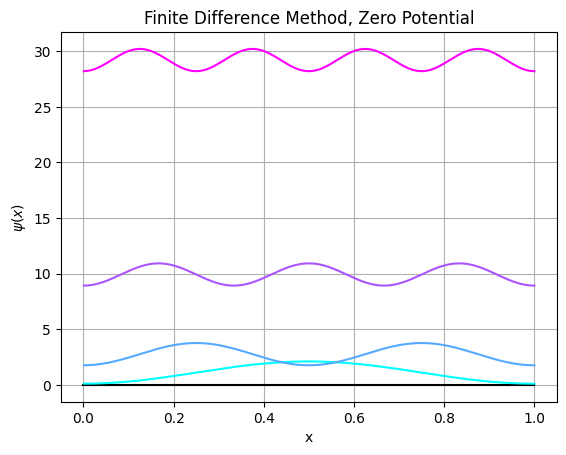

In [14]:
shooting_method(zero_potential, num_plots = 4)

### Eigenstate Evolution

https://github.com/lukepolson/youtube_channel/blob/main/Python%20Metaphysics%20Series/vid17.ipynb

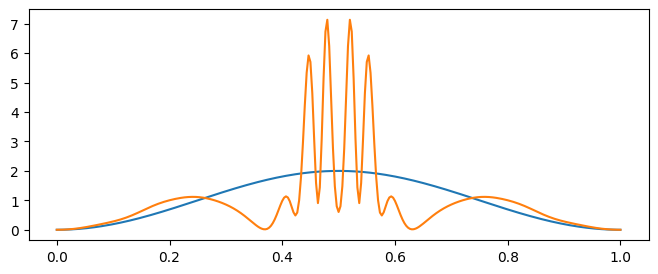

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import jit
from scipy.linalg import eigh_tridiagonal

Nx = 301
dx = 1/(Nx-1)
x = np.linspace(0, 1, Nx)
psi0 = np.sqrt(2)*np.sin(np.pi*x)

def V(x):
    mu, sigma = 1/2, 1/20
    return -1e4*np.exp(-(x-1/2)**2/(2*(1/20)**2))

d = 1/dx**2 + V(x)[1:-1]
e = -1/(2*dx**2) * np.ones(len(d)-1)
w, v = eigh_tridiagonal(d, e)

E_js = w[0:70]
psi_js = np.pad(v.T[0:70], [(0, 0), (1, 1)], mode='constant')
cs = np.dot(psi_js, psi0)
def psi_m2(t):
    return psi_js.T@(cs*np.exp(-1j*E_js*t))

plt.figure(figsize=(8,3))
plt.plot(x, psi0**2)
plt.plot(x, np.absolute(psi_m2(10000*dx))**2)

https://www.maths.tcd.ie/~dbennett/js/schro.pdf